In [1]:
# Retrieve List of All Released Marvel Cinematic Universe Movies

import requests
import lxml.html as lx
from datetime import datetime

url = 'https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_films'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.4.1 Safari/605.1.15'}
response = requests.get(url, headers=headers) #requests the html page
html_content = response.text #retrieves the html text
html = lx.fromstring(html_content) #parses through the html 
movies_list = html.xpath("//main//table//tr/th/i/a[not(contains(@href, '#'))]/@href") #specifies that we only want the list of movies
release_dates = html.xpath("//main//table//tr/th/i/a[not(contains(@href, '#'))]/ancestor::th/following-sibling::td[1]/text()") #accesses the release dates for these movies
cleaned_dates = [date.strip().replace("\xa0", " ") for date in release_dates if date.strip()] #cleans up the release dates to be used for comparison
date_format = "%B %d, %Y" #Specifies the date format
released_movies = []
for movie, date in zip(movies_list, cleaned_dates): #iterates through the movie names and release dates 
    try:
        release_date = datetime.strptime(date, date_format) #changes the date format
        if release_date <= datetime.today(): #if the movie has released we add it to the list
            released_movies.append(movie)
    except ValueError: #elsewise we just continue
        continue
print(released_movies)

['/wiki/Iron_Man_(2008_film)', '/wiki/The_Incredible_Hulk_(film)', '/wiki/Iron_Man_2', '/wiki/Thor_(film)', '/wiki/Captain_America:_The_First_Avenger', '/wiki/The_Avengers_(2012_film)', '/wiki/Iron_Man_3', '/wiki/Thor:_The_Dark_World', '/wiki/Captain_America:_The_Winter_Soldier', '/wiki/Guardians_of_the_Galaxy_(film)', '/wiki/Avengers:_Age_of_Ultron', '/wiki/Ant-Man_(film)', '/wiki/Captain_America:_Civil_War', '/wiki/Doctor_Strange_(2016_film)', '/wiki/Guardians_of_the_Galaxy_Vol._2', '/wiki/Spider-Man:_Homecoming', '/wiki/Thor:_Ragnarok', '/wiki/Black_Panther_(film)', '/wiki/Avengers:_Infinity_War', '/wiki/Ant-Man_and_the_Wasp', '/wiki/Captain_Marvel_(film)', '/wiki/Avengers:_Endgame', '/wiki/Spider-Man:_Far_From_Home', '/wiki/Black_Widow_(2021_film)', '/wiki/Shang-Chi_and_the_Legend_of_the_Ten_Rings', '/wiki/Eternals_(film)', '/wiki/Spider-Man:_No_Way_Home', '/wiki/Doctor_Strange_in_the_Multiverse_of_Madness', '/wiki/Thor:_Love_and_Thunder', '/wiki/Black_Panther:_Wakanda_Forever', '/

In [2]:
# Creates a dictionary to store reviews
base_url = "https://en.wikipedia.org"
review_dict = {} #creates an empty dictionary where we will store the reviews

for movie_url in released_movies: #iterates through each movie
    response = requests.get(base_url + movie_url, headers={'User-Agent': 'Mozilla/5.0'})
    movie_content = response.text
    html = lx.fromstring(movie_content) #parses each html

    critical_response_div = html.xpath("//div[h3[@id='Critical_response']]") #accesses the critical response section

    if critical_response_div:
        critical_response_div = critical_response_div[0] #accesses the first div

        # Extract paragraphs until reaching div that contains h with "Accolades
        critical_response_content = []
        for elem in critical_response_div.xpath("following-sibling::*"):
            if elem.tag == 'div' and elem.xpath(".//h3[@id='Accolades']"):
                break
            if elem.tag == 'p':
                text_content = ''.join(elem.xpath(".//text()")).strip()
                if text_content:
                    critical_response_content.append(text_content)

        review_dict[movie_url] = critical_response_content #adds the movie to the dictionary as well as the review

review_dict

{'/wiki/Iron_Man_(2008_film)': ['The review aggregator Rotten Tomatoes reported an approval rating of 94%, with an average score of 7.7/10, based on 282 reviews. The website\'s critical consensus reads, "Powered by Robert Downey Jr.\'s vibrant charm, Iron Man turbo-charges the superhero genre with a deft intelligence and infectious sense of fun."[137] On Metacritic, the film has an average score of 79 out of 100, based on 38 critics, indicating "generally favorable reviews".[138] Audiences polled by CinemaScore gave the film an average grade of "A" on an A+ to F scale.[139]',
  'Among the major trade journals, Todd McCarthy of Variety called the film an "expansively entertaining special effects extravaganza" with "fresh energy and stylistic polish",[28] while Kirk Honeycutt of The Hollywood Reporter praised the film, while nonetheless finding "disappointment [in] a climatic  [sic] battle between different Iron Man prototypes ... how did Tony\'s nemesis learn how to use the suit?"[140] 

In [3]:
#Custom words that must be removed in order to  make the wikipedia artical less objective
custom_words = ['film', 'year', 'reviews','review','written', 'said', 'grade', 'got', 'nt', 'sequel', 'mccarthy', 'wrote', 'gave', 
                'include', 'mcu', 'critic', 'filming', 'feature', 'featuring', 'girl', 'genre', 'generally', 'galaxy', 
                'franchise', 'fourth', 'marketing', 'superhero', 'joined', 'released', 'dimension', 'element', 'role', 'movie'
                'score', 'cast', 'sequence', 'development', 'work', 'time', 'year', 'month', 'previous', 'based', 'review',
                'called', 'selected', 'stated', 'reported', 'noted', 'compared', 'expressed', 'final', 'respectively', 'come', 'finished', 
                'member','like', 'later', 'lead', 'leaf', 'lean', 'left', 'likelihood', 'score', 's', 'a', 'major', 'suit', 'one', 'first',
                'made', 'material', 'nt', 'man', 'four', 'movie', 'least', 'magazine', 'military', 'around', 'also', 'still', 'ca', 'frame',
               'finding', 'eye', 'website', 'game','fleet', 'story', 'lot', 'say','fan','way', 'fare', 'green', 'summer', 'identity',
               'hero', 'hum', 'humanity', 'predecessor', 'close', 'quite','frankly', 'widening', 'prequel', 'writing', 'average', '',
               'whilst', 'entire', 'feel', 'eyes', 'weeklies','ways','rating','years', 'hums', 'watching', 'frames', 'favorable', 'favor',
               'writer', 'defend', 'flesh', 'god', 'element', 'debut', 'delivers', 'exercise', 'character', 'script', 'particular',
               'team', 'kid', 'swinging', 'saying', 'relationship', 'director', 'felt', 'critics', 'audiences', 'viewers', 'new', 'despite',
               'transalations', 'release', 'films', 'latest', 'origin', 'narrative', 'stars', 'direction', 'focus', 'performances', 'white',
               'people', 'ban', 'subreddit', 'ending', 'little', 'sense', 'stars', 'deliver', 'rogerebertcom','posttrak', 'described', 'make',
               'reliance', 'feels', 'stating', 'scenes', 'better', 'animal', 'series', 'films', 'star', 'dacosta', 'matter', 'weighted', 'ii'
               'worth', 'consensus', 'describing', 'dimensions', 'declared', 'delivered', 'playing', 'exactly', 'audience', 'experience', 'elements',
                'mission', 'opening', 'stealth', 'calling', 'moment', 'creating', 'superheroes', 'devotees', 'visual', 'seen', 'addition',
               'hard', 'positive', 'defore', 'history', 'children', 'watched', 'subscribers', 'times', 'brothers', 'audience', 'anticipated',
               'thing', 'critical', 'good', 'teen', 'sequences', 'feeling', 'audience', 'weight', 'group', 'subject', 'end','emerges', 'emphasized',
               'going', 'metal', 'meet', 'lines', 'kick', 'indicating', 'entertaining', 'example', 'feelings', 'ii', 'multiple', 'multiple',
               'movies', 'use', 'noise', 'finally', 'filmmakers', 'vanished', 'finds', 'fans', 'parts', 'blockbuster', 'head', 'idols', 'hunks',
               'line', 'embraces', 'efficiently', 'enthusiastic', 'hint', 'established', 'exuded',  'predecessors', 'preteen', 'early', 'handful',
               'zip', 'echoed', 'expression', 'goodsaction', 'entirely', 'episodes', 'expect', 'fairly', 'fantasyaction', 'docksin', 'exploding',
               'heat', 'far', 'fatherson', 'digital', 'gets', 'drawn', 'comic', 'keeps', 'look', 'designer', 'simply', 'fixes', 'entry', 'dilemma',
               'frequently', 'praised', 'enjoyment', 'diehards', 'difficult', 'equally', 'expectas', 'fully', 'desperationis', 'zingers', 'body', 
                'suddenly', 'flashes', 'half', 'evil', 'handling', 'dictated', 'day', 'giving', 'things', 'helpfully', 'directing', 'media', 'lots', 
                'outlet', 'evident', 'featured', 'fear', 'lasalle', 'generalized', 'translations', 'instant', 'foe', 'interactions',
               'fatherdaughter', 'genres', 'fundamentally', 'feet', 'fashion', 'ghost', 'genuinely', 'giddying', 'given', 'graced',
               'dozen', 'compromised', 'considering', 'contrary', 'comicbook', 'compromise', 'crosspollination', 'criticized', 'dangling', 
                'decidedly', 'coming', 'definite', 'dodgeball', 'dustup', 'emerged', 'especially', 'filmgoers','everythingand', 'save',
                'writerdirector','dropping', 'door', 'overall', 'concluded', 'praising', 'trying', 'followup','kickoff', 'codirectors', 
                'working', 'fuelled', 'funif', 'proves', 'offset', 'reception', 'coherence', 'cinemascore', 'sexiness', 'charisma', 'list',
               'obligation', 'grading', 'fixed', 'updating', 'ones', 'including', 'getting', 'exclaiming', 'best', 'school', 'twist', 'assigned', 
                'believed', 'flying', 'focusing', 'human', 'goes', 'instead', 'flip','ground', 'high','highlighted', 'hit', 'indiewire',
               'comparing', 'indigenous', 'vehicles', 'particularly','zooming', 'means', 'gofundme', 'gay','politics', 'agreed', 'laughs', 'streak', 
                'banned', 'theaters', 'set', 'user', 'making', 'continent', 'weekend', 'portrayed', 'administrators', 'explosion', 'figure','finale', 
                'effectsheavy','following', 'gathered', 'number','able', 'create', 'online', 'secondmost', 'male', 'included', 'ing', 'according', 
                'department', 'foundation', 'aggregator', 'gifts', 'expectations', 'instantly', 'fundamental', 'hours', 'hammerhurling',
               'illustration', 'fallen', 'falls', 'extended', 'figured', 'expressly', 'enterprise', 'filmmaking', 'favorite',
               'doors', 'era', 'exists', 'franchises', 'games', 'highest', 'moments', 'world', 'housekeeping', 'perception', 
                'pathos', 'occasionally', 'maybe', 'kickor', 'consequence', 'death', 'supporting', 'fighting', 'past', 'fantasy', 'drowned', 
                'earlier', 'zapfree', 'guns', 'feared', 'approach', 'crisis', 'thought', 'directions', 'fizz', 'examination', 'definitely',
               'whoops', 'labors', 'labeling', 'approval', 'appreciate', 'likened', 'members', 'considered', 'started', 'saw', 'know', 'response',
               'ed', 'terms', 'soldiers', 'makes', 'polled', 'edge', 'allowed', 'tells', 'dour', 'depiction', 'galactic', 'endangered', 'events', 
                'exception', 'delivering', 'faced', 'flashback', 'deeply','flashbackfilled', 'foes', 'galaxysaving', 'gives', 'deemed', 'gonzo',
               'gotg', 'conclusion', 'grace', 'help', 'gravely', 'hug', 'gotten', 'heroes', 'intergalactic', 'scored','contrast', 'title', 'ign',
               'machine', 'commentary', 'caused', 'president', 'empathy', 'office','recent', 'received', 'joked', 'screen', 'scene', 'executed', 
                'facilitating', 'figuratively', 'exceeds', 'fake', 'functional', 'features', 'gruff', 'guffaw', 'grin', 'unusually', 'looks',
               'onetime', 'kicks', 'goods', 'includes', 'impression', 'lump', 'period','forearm', 'flight','friggin', 'house','doctor',
               'life', 'leaned', 'bus', 'men', 'mentioning']

In [4]:
# Preprocessing for LDA and Sentiment Analysis
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

def remove_names_regex(text): #Function that removes names from the review. Ex. "Downey", "Ruffalo"
    return re.sub(r'\b[A-Z][a-z]+\b', '', text)

stop_words = set(stopwords.words('english')) #sets stop words which we will remove later. Ex. "the", "it"

cleaned_reviews = {}

for key, value in review_dict.items(): #cycles through every item in the review dictionary
    review_text = ''.join(value) #joins the items in each movie value
    review_text = remove_names_regex(review_text) #removes names
    review_text = review_text.lower() #lowers the text
    words = nltk.word_tokenize(review_text) #tokenizes the text by words
    cleaned_tokens = [re.sub(r'[^a-zA-Z\s]', '', word).strip() for word in words] #cleans the tokens, removing non-alphabet characters
    filtered_tokens = [word for word in cleaned_tokens if word not in stop_words] #filters out stop words
    even_more_filtered_tokens = [word for word in filtered_tokens if word.lower() not in custom_words] #filters out the custom words
    cleaned_combined = ' '.join(even_more_filtered_tokens) #recombines the tokens into paragraphs
    cleaned_reviews[key] = cleaned_combined #appends the movies with their cleaned reviews
    
for key, sentences in cleaned_reviews.items():
    print(key)
    print(sentences)

/wiki/Iron_Man_(2008_film)
reads vibrant charm turbocharges deft intelligence infectious fun f scale trade journals expansively special effects extravaganza fresh energy stylistic polish nonetheless disappointment climatic sic battle different prototypes nemesis learn majordaily newspaper lauded emotional truth pitchperfect casting plausibly rendered superscience faithful source recognizing enduring hightech cool condition performance powers liftoff separating picture since certainly problems unusual specialty press commended impressive sets mechanics combine smoothly relatively seamless cg along rise formula result something hardly original groundbreaking nevertheless refreshing earnestness avoid dark dramatic stylings easygoing crowdpleasing action sprinkle antiwar redemption themes metropolitan shapely piece mythmaking go stylized real think thriller conversely negative claiming slightly depressed goingthroughthemotions show palpitating much antique loves chases dispirited taken gra

In [10]:
# Topic Modeling with LDA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

lda_results = []

for key, review in cleaned_reviews.items():  #iterates through each item 
    key = re.sub(r'^/wiki/|[^\w\s]|_\(\d{4}_film\)', '', key)
    print(f"\nProcessing LDA for Review {key}...")

    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform([review])  # Vectorize the single review

    lda = LatentDirichletAllocation(n_components=1, random_state=2025)  # Adjust topics as needed
    lda.fit(X)

    terms = vectorizer.get_feature_names_out()

    topics = []
    for idx, topic in enumerate(lda.components_):
        top_words = [terms[i] for i in topic.argsort()[:-6:-1]]  # Top 5 words per topic (1 topic)
        topics.append(top_words)
        print(f"Topic #{idx}: {top_words}")

    # Store results
    lda_results.append({"review_index": f'{key}', "words": topics}) #adds words per topic (1 topic) per movies


Processing LDA for Review Iron_Man...
Topic #0: ['vibrant', 'fresh', 'dispirited', 'dramatic', 'earnestness']

Processing LDA for Review The_Incredible_Hulk_film...
Topic #0: ['action', 'big', 'wit', 'dare', 'hope']

Processing LDA for Review Iron_Man_2...
Topic #0: ['fun', 'villains', 'unexpected', 'mixed', 'misguided']

Processing LDA for Review Thor_film...
Topic #0: ['mixed', 'wit', 'dazzling', 'inconsistent', 'imagination']

Processing LDA for Review Captain_America_The_First_Avenger...
Topic #0: ['wise', 'villains', 'nostalgia', 'negative', 'mixed']

Processing LDA for Review The_Avengers...
Topic #0: ['humor', 'superior', 'acting', 'characters', 'exceptional']

Processing LDA for Review Iron_Man_3...
Topic #0: ['humor', 'action', 'wit', 'surprises', 'riot']

Processing LDA for Review Thor_The_Dark_World...
Topic #0: ['battle', 'mixed', 'humor', 'wrenching', 'highstakes']

Processing LDA for Review Captain_America_The_Winter_Soldier...
Topic #0: ['action', 'cgi', 'lack', 'emotio

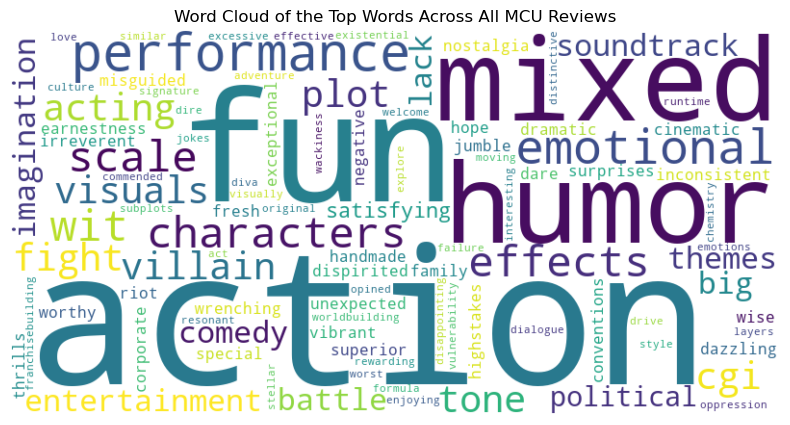

In [9]:
# Collect all top words into a single string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_words = " ".join([" ".join(res["words"][0]) for res in lda_results]) #joins words for every review

# Generates word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(all_words) 

# Display the word cloud with matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of the Top Words Across All MCU Reviews")
plt.show()

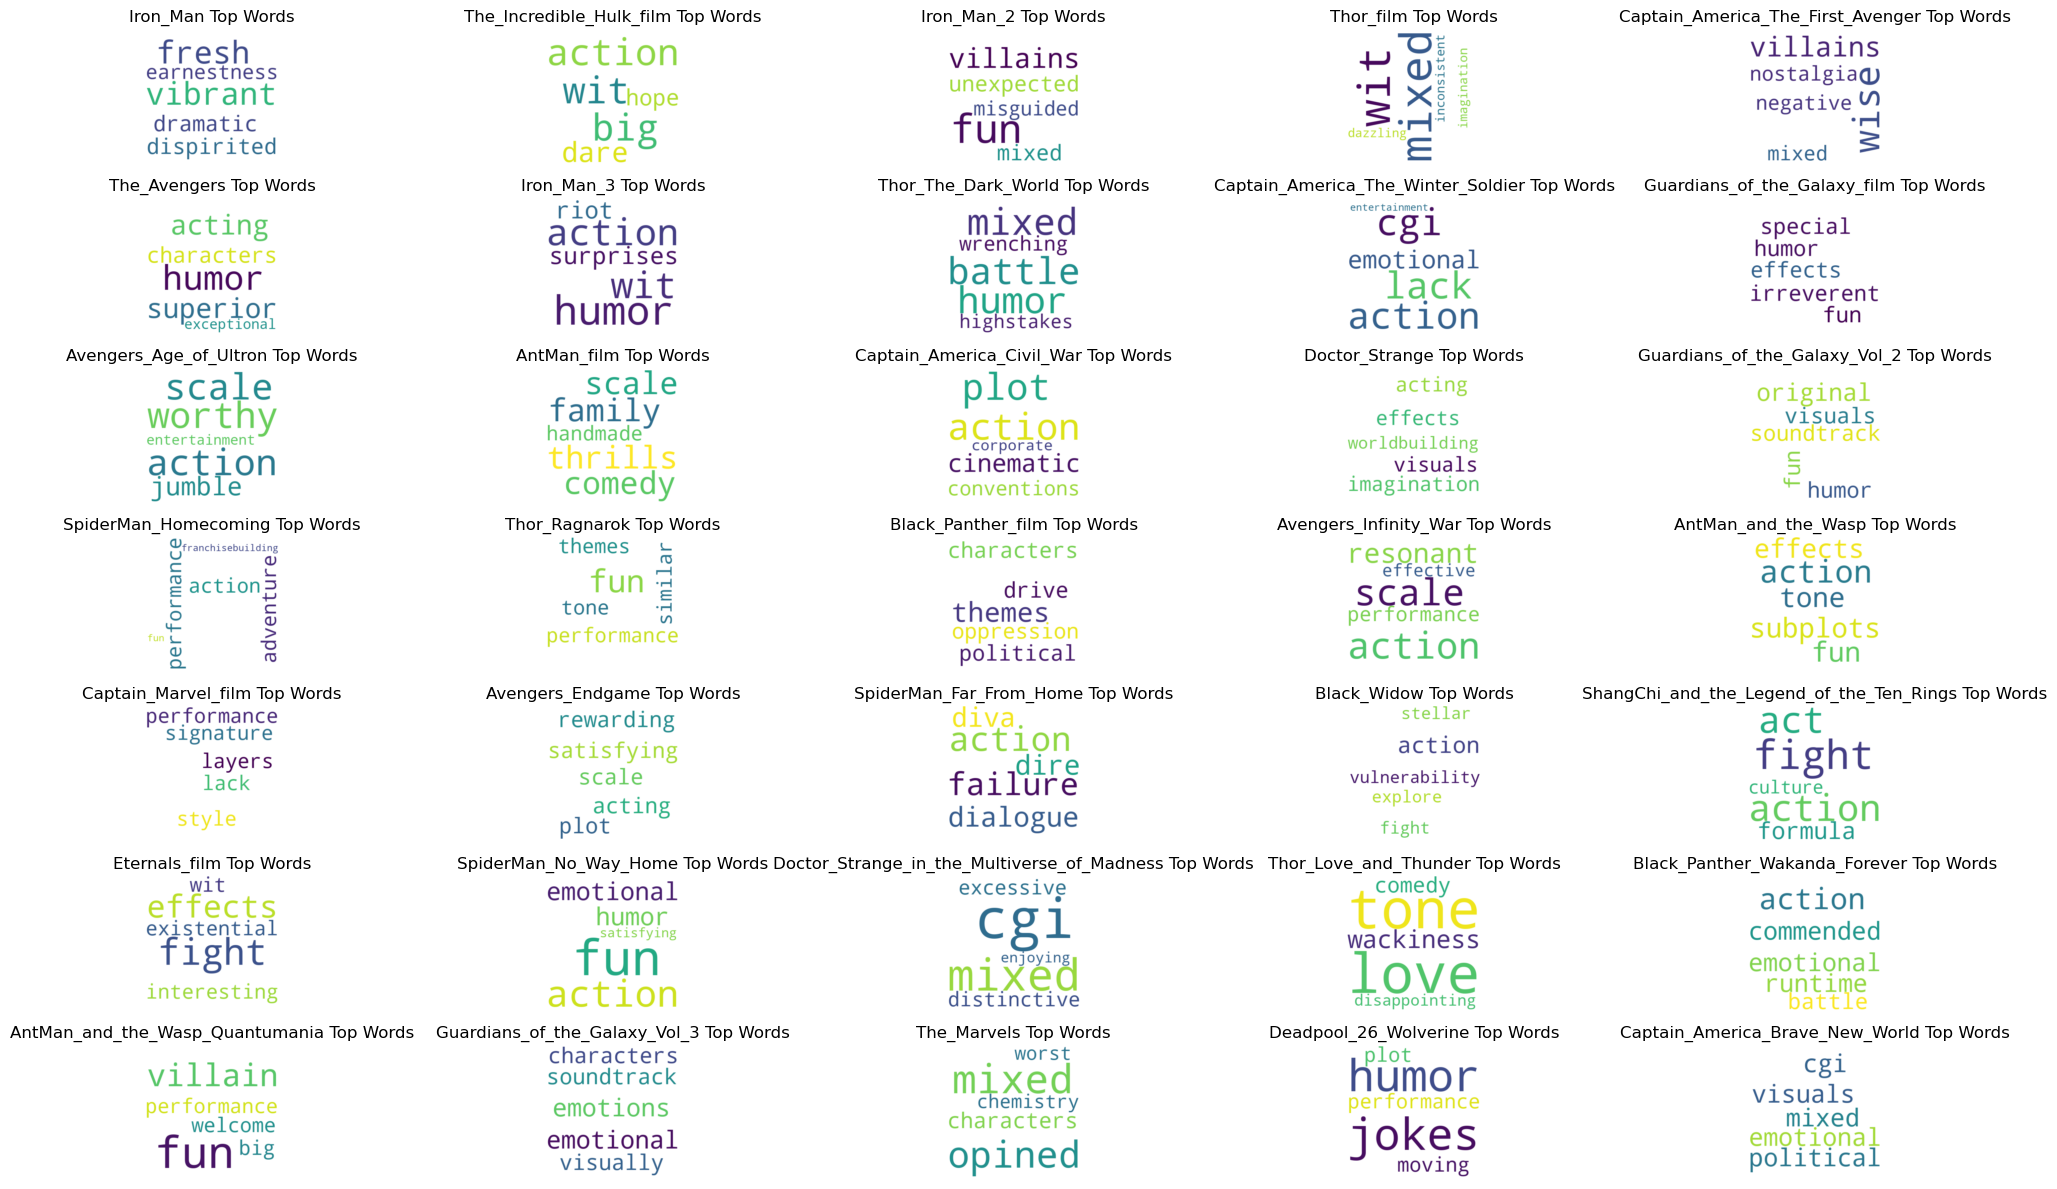

In [12]:
#Word cloud per review
# Number of reviews to visualize
num_reviews = min(35, len(lda_results))

fig, axes = plt.subplots(7, 5, figsize=(22, 12)) #specifies dimensions of word cloud
axes = axes.flatten()

for i, res in enumerate(lda_results[:num_reviews]):
    review_index = res["review_index"]
    top_words = res["words"][0]

    # Generates word cloud
    wordcloud = WordCloud(background_color='white', width=400, height=400).generate(" ".join(top_words))

    # Plots the word clouds
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"{review_index} Top Words")

plt.tight_layout()
plt.show()

In [13]:
# Initial Sentiment Analysis using Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
for movie in released_movies:
    sentiment = sia.polarity_scores(cleaned_reviews[movie]) #returns polarity scores
    print(movie, sentiment)

/wiki/Iron_Man_(2008_film) {'neg': 0.103, 'neu': 0.59, 'pos': 0.306, 'compound': 0.9825}
/wiki/The_Incredible_Hulk_(film) {'neg': 0.177, 'neu': 0.552, 'pos': 0.271, 'compound': 0.9559}
/wiki/Iron_Man_2 {'neg': 0.151, 'neu': 0.543, 'pos': 0.306, 'compound': 0.8625}
/wiki/Thor_(film) {'neg': 0.149, 'neu': 0.512, 'pos': 0.339, 'compound': 0.9525}
/wiki/Captain_America:_The_First_Avenger {'neg': 0.083, 'neu': 0.522, 'pos': 0.395, 'compound': 0.981}
/wiki/The_Avengers_(2012_film) {'neg': 0.098, 'neu': 0.543, 'pos': 0.36, 'compound': 0.9962}
/wiki/Iron_Man_3 {'neg': 0.17, 'neu': 0.577, 'pos': 0.253, 'compound': 0.962}
/wiki/Thor:_The_Dark_World {'neg': 0.229, 'neu': 0.503, 'pos': 0.268, 'compound': 0.5994}
/wiki/Captain_America:_The_Winter_Soldier {'neg': 0.142, 'neu': 0.599, 'pos': 0.259, 'compound': 0.9432}
/wiki/Guardians_of_the_Galaxy_(film) {'neg': 0.091, 'neu': 0.509, 'pos': 0.4, 'compound': 0.9965}
/wiki/Avengers:_Age_of_Ultron {'neg': 0.182, 'neu': 0.576, 'pos': 0.242, 'compound': 0.

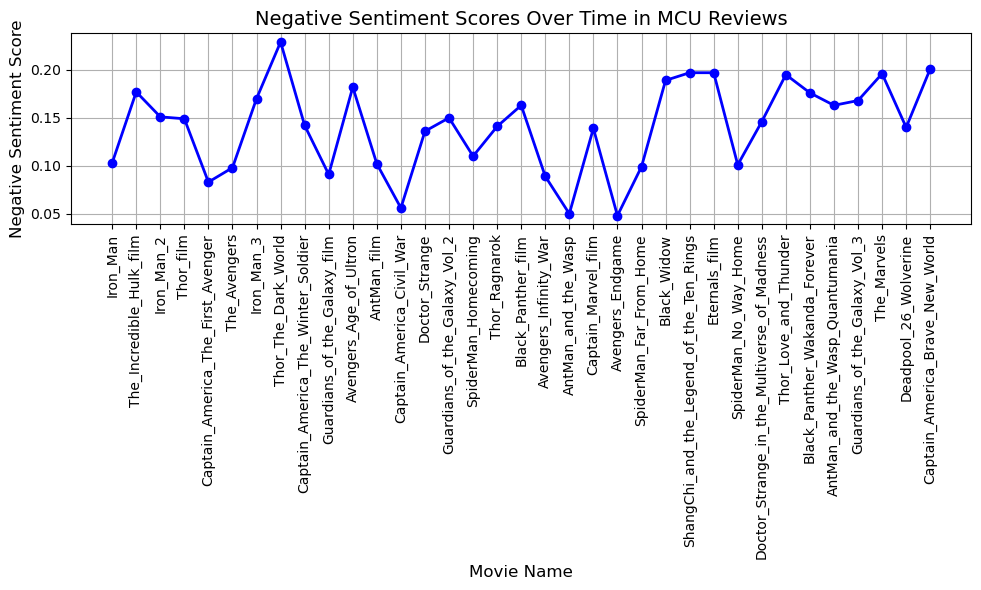

In [14]:
# Sentiment Analysis Across Movies
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# List negative sentiment scores for each review
negative_sentiment_scores = []
review_indices = []  # List store review indices (movie names)

# Loop through each review
for i, movie in enumerate(released_movies):
    review = cleaned_reviews[movie]
    
    movie = re.sub(r'^/wiki/|[^\w\s]|_\(\d{4}_film\)', '', movie) #cleans movie names
    sentiment = sia.polarity_scores(review)  # Get sentiment scores like in the previous step
    
    negative_sentiment_scores.append(sentiment['neg'])  # Extract the negative sentiment score
    review_indices.append(f"{movie}")  

plt.figure(figsize=(10, 6)) # Creates the plot of negative sentiment scores over reviews
plt.plot(review_indices, negative_sentiment_scores, marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)

plt.title("Negative Sentiment Scores Over Time in MCU Reviews", fontsize=14)
plt.xlabel("Movie Name", fontsize=12)
plt.ylabel("Negative Sentiment Score", fontsize=12)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()